In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.27)})

### Get the DataFrames for all the csv's  

In [2]:
path = './competitive-data-science-predict-future-sales/'
item_cat    = pd.read_csv(path + 'item_categories.csv')
items       = pd.read_csv(path + 'items.csv')
sales_train = pd.read_csv(path + 'sales_train.csv')
shops       = pd.read_csv(path + 'shops.csv')
test        = pd.read_csv(path + 'test.csv')

In [ ]:
item_cat_cols = item_cat.columns
item_cat_list = pd.unique(item_cat.item_category_name)
sales_train.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

<AxesSubplot:xlabel='item_id', ylabel='item_cnt_day'>

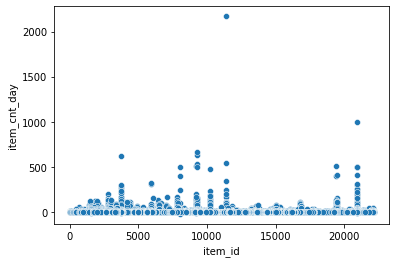

In [ ]:
sns.scatterplot( x=sales_train['item_id'], y=sales_train['item_cnt_day'])

<AxesSubplot:xlabel='item_price', ylabel='item_cnt_day'>

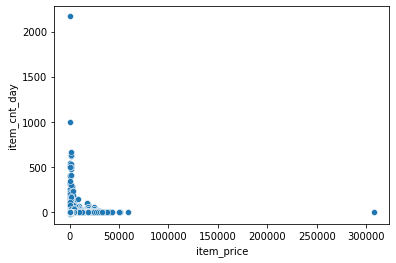

In [ ]:
sns.scatterplot( x=sales_train['item_price'], y=sales_train['item_cnt_day'])

In [ ]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [5]:
no_date = sales_train.drop(columns=['date'])


In [77]:
months = no_date.groupby(by='date_block_num')['item_cnt_day'].agg('sum').reset_index()

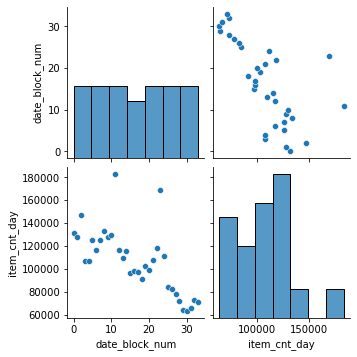

In [15]:
sns.pairplot(months)

<AxesSubplot:xlabel='date_block_num', ylabel='item_cnt_day'>

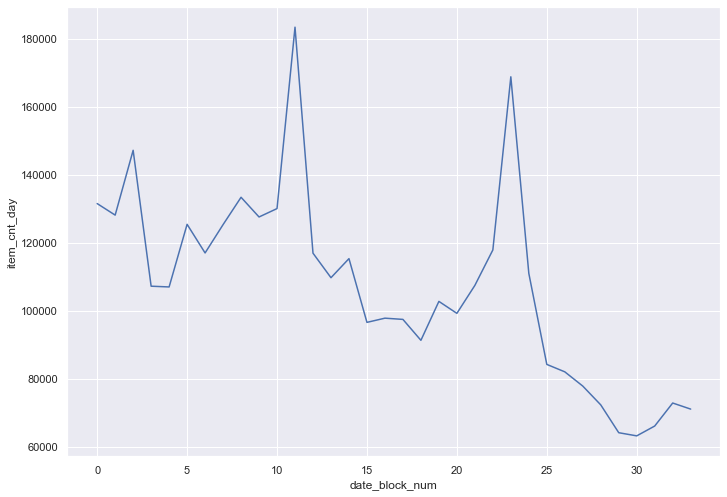

In [81]:
sns.lineplot(data=months, x='date_block_num', y='item_cnt_day')


So what if we look at sales per month year on year? for examle how do all the Januarys compare?


In [53]:
months['date_block_num']= months['date_block_num'].replace([0,12,24],[1.13,1.14,1.15]).replace([1,13,25],[2.13,2.14,2.15]).replace([2,14,26],[3.13,3.14,3.15]).replace([3,15,27],[4.13,4.14,4.15]).replace([4,16,28],[5.13,5.14,5.15]).replace([5,17,29],[6.13,6.14,6.15]).replace([6,18,30],[7.13,7.14,7.15]).replace([7,19,31],[8.13,8.14,8.15]).replace([8,20,32],[9.13,9.14,9.15]).replace([9,21,33],[10.13,10.14,10.15]).replace([10,22],[11.13,11.14]).replace([11,23],[12.13,12.14])

jan = months[months['date_block_num'] < 2]
feb = months[months['date_block_num'] < 3]
mar = months[months['date_block_num'] < 4]

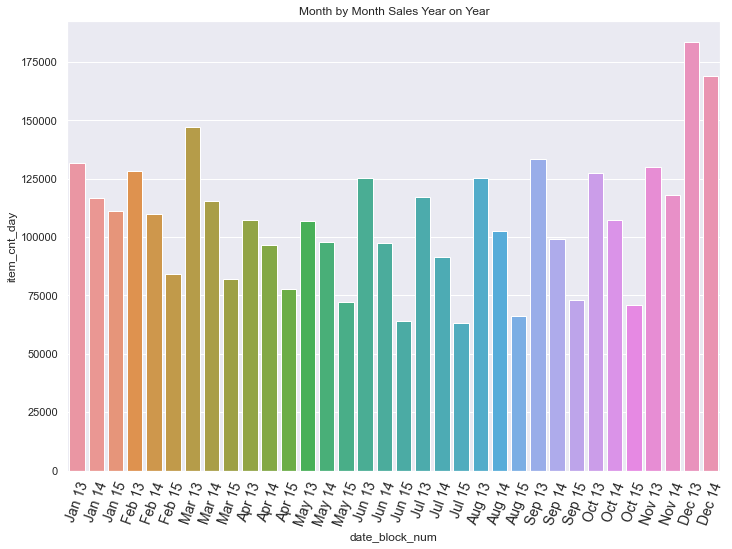

In [39]:
labels = ["Jan 13", "Jan 14", "Jan 15", "Feb 13", "Feb 14", "Feb 15", "Mar 13", "Mar 14", "Mar 15", "Apr 13", "Apr 14", "Apr 15","May 13", "May 14", "May 15", "Jun 13", "Jun 14", "Jun 15", "Jul 13", "Jul 14", "Jul 15", "Aug 13", "Aug 14", "Aug 15", "Sep 13", "Sep 14", "Sep 15", "Oct 13", "Oct 14","Oct 15", "Nov 13", "Nov 14", "Dec 13", "Dec 14"]
bar = sns.barplot(data=months,x='date_block_num', y='item_cnt_day')
plt.title("Month by Month Sales Year on Year")
bar.set_xticklabels(labels, fontsize=14, rotation=70);

Usefull info:
 Nov 13 date_block_num = 10
 Nov 14 date_block_num = 22

In [47]:
novs = [1.13,1.14,1.15,2.13,2.14,2.15,3.13,3.14,3.15,4.13,4.14,4.15,5.13,5.14,5.15,6.13,6.14,6.15,7.13,7.14,7.15,8.13,8.14,8.15,9.13,9.14,9.15,10.13,10.14,10.15,11.13,11.14, 12.13, 12.14]
counts = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]}
for n in novs:
    m = int(n)
    x = months.item_cnt_day[months.date_block_num == n].values
    counts[m].append(x[0])
counts

{1: [131479.0, 116899.0, 110971.0],
 2: [128090.0, 109687.0, 84198.0],
 3: [147142.0, 115297.0, 82014.0],
 4: [107190.0, 96556.0, 77827.0],
 5: [106970.0, 97790.0, 72295.0],
 6: [125381.0, 97429.0, 64114.0],
 7: [116966.0, 91280.0, 63187.0],
 8: [125291.0, 102721.0, 66079.0],
 9: [133332.0, 99208.0, 72843.0],
 10: [127541.0, 107422.0, 71056.0],
 11: [130009.0, 117845.0],
 12: [183342.0, 168755.0]}

In [55]:
ave_decline = {1:[],2:[],3:[],4:[],5:[],6:[],7:[],8:[],9:[],10:[],11:[],12:[]} #{1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}
for n, vals in counts.items():
    t = []
    p = 0
    for v in vals: 
        if p == 0:
            p = v
        else:
            t.append(1-(v / p))
        p = v
    ave_decline[n] = t

ave_decline

{1: [0.11089223374074952, 0.05071044234766764],
 2: [0.14367241783121243, 0.2323794068576951],
 3: [0.21642359081703388, 0.28867186483603213],
 4: [0.0992070155798116, 0.19397033845643974],
 5: [0.08581845377208563, 0.2607117292156662],
 6: [0.22293648957976087, 0.34194131110860215],
 7: [0.21960227758493922, 0.3077673093777388],
 8: [0.18014063260729019, 0.35671381703838556],
 9: [0.2559325593255932, 0.2657547778404967],
 10: [0.1577453524748904, 0.3385340060695202],
 11: [0.09356275334784514],
 12: [0.07956169344721886]}

In [57]:
t = 0
for x, y in ave_decline.items():
    if len(y) > 1:
        t += y[1]
dec_last_year = t/10 
dec_last_year

0.2637155003148244

So the average decline for the year of 15 compared to 14 is 0.2637, so maybe we can just apply that to the novermber data from the year before to make our predictions. 

In [60]:
df_nov_14 = sales_train[sales_train.date_block_num == 33 - 11]
nov14 = df_nov_14.groupby(by=["item_id","shop_id"])['item_cnt_day'].agg(['sum']).reset_index()
nov14.describe()

,item_id,shop_id,sum
count,45755.000000,45755.000000,45755.000000
mean,10549.054136,33.593006,2.575566
std,6307.061181,16.299533,10.963397
min,2.000000,2.000000,-1.000000
25%,4807.000000,22.000000,1.000000
50%,10296.000000,31.000000,1.000000
75%,16056.000000,48.000000,2.000000
max,22167.000000,59.000000,888.000000


In [74]:
pred_df = test.merge(nov14, how='left',on=["shop_id", "item_id"])
pred_df = pred_df.fillna(0)
pred_df = pred_df.rename(columns={'sum':'item_cnt_month'})
pred_df.item_cnt_month = pred_df.item_cnt_month * (1-0.09356275334784514)
pred_df.item_cnt_month = pred_df.item_cnt_month.clip(lower=0, upper=20)
pred_df.describe()

,ID,shop_id,item_id,item_cnt_month
count,214200.000000,214200.000000,214200.000000,214200.000000
mean,107099.500000,31.642857,11019.398627,0.234521
std,61834.358168,17.561933,6252.644590,1.227649
min,0.000000,2.000000,30.000000,0.000000
25%,53549.750000,16.000000,5381.500000,0.000000
50%,107099.500000,34.500000,11203.000000,0.000000
75%,160649.250000,47.000000,16071.500000,0.000000
max,214199.000000,59.000000,22167.000000,20.000000


In [75]:
sub = pred_df[['ID','item_cnt_month']]
sub.to_csv('./competitive-data-science-predict-future-sales/decline_submission.csv', index=False)